In [ ]:
from graphviz import Digraph
dot = Digraph(comment="Example Pedigree : Power of Two")

In [ ]:
prefounders = {0:'B73', 1:'B97', 2:'CML103', 3:'CML228', 4:'CML247', 5:'CML277',
            6:'CML322', 7:'CML333', 8:'CML52', 9:'CML69', 10:'HP301',
            11:'IL14H', 12:'KI11', 13:'KI3', 14:'KY21', 15:'M162W', 16:'M37W',
            17:'M018W', 18:'MS71', 19:'NC350', 20:'NC358', 21:'OH43',
            22:'OH7B', 23:'P39', 24:'TX303', 25:'TZI8'}
parents = [2, 14, 16, 8, 10, 12, 4, 6]

In [ ]:
def pedigree_generator(prefounders, parents):
    pedigree_graph = Digraph(comment="Pedigree")
    for i in range(8):
        pedigree_graph.node(str(parents[i]), prefounders[parents[i]])
    return pedigree_graph

In [ ]:
[(parents[i], parents[i+1]) for i in range(0, 8, 2)]
[((parents[i], parents[i+1]),((parents[i+2], parents[i+3]))) for i in range(0, 8, 4)]

In [ ]:
dot.node('2/14','CML103/KY21')
dot.node('16/8','M37W/CML52')
dot.node('10/12','HP301/KI11')
dot.node('4/6','CML247/CML322')

In [ ]:
dot.edge('2', '2/14')
dot.edge('14', '2/14')
dot.edge('16', '16/8')
dot.edge('8', '16/8')
dot.edge('10', '10/12')
dot.edge('12', '10/12')
dot.edge('4', '4/6')
dot.edge('6', '4/6')

In [ ]:
# 2/14//16/8
# 10/12//4/6
dot.node('2/14//16/8', 'CML103/KY21//M37W/CML52')
dot.node('10/12//4/6', 'HP301/KI11//CML247/CML322')
dot.edge('2/14', '2/14//16/8')
dot.edge('16/8', '2/14//16/8')
dot.edge('10/12', '10/12//4/6')
dot.edge('4/6', '10/12//4/6')
# 2/14//16/8///10/12//4/6
dot.node('2/14//16/8///10/12//4/6', 'CML103/KY21//M37W/CML52///HP301/KI11//CML247/CML322')
dot.edge('2/14//16/8', '2/14//16/8///10/12//4/6')
dot.edge('10/12//4/6', '2/14//16/8///10/12//4/6')

In [ ]:
dot.render("mock-pedigree.pdf", view=True)

In [ ]:
from Bio import Entrez

In [ ]:
from reportlab.lib.units import cm

In [ ]:
from Bio.Graphics import BasicChromosome

In [ ]:
entries = [("Chr I", 30432563),
           ("Chr II", 19705359),
           ("Chr III", 23470805),
           ("Chr IV", 18585042),
           ("Chr V", 26992728)]

In [ ]:
max_len = entries[0][1]

In [ ]:
telomere_length = 100000
chr_diagram = BasicChromosome.Organism()
chr_diagram.page_size = (29.7*cm, 21*cm)

In [ ]:
for name, length in entries:
    cur_chromosome = BasicChromosome.Chromosome(name)
    cur_chromosome.scale_num = max_len + 2*telomere_length
    
    start = BasicChromosome.TelomereSegment()
    start.scale = telomere_length
    cur_chromosome.add(start)
    
    body = BasicChromosome.ChromosomeSegment()
    body.scale = length
    cur_chromosome.add(body)
    
    end = BasicChromosome.TelomereSegment(inverted=True)
    end.scale = telomere_length
    cur_chromosome.add(end)
    
    chr_diagram.add(cur_chromosome)
chr_diagram.draw("simple_chroms.pdf", "Arabidopsis thaliana")

In [ ]:
from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
fig, ax = plt.subplots(1, 1)
mean, var = expon.stats(moments="mv")
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
ax.grid(True)
ax.set_title("Distribution of Allelic Effects")
ax.text(2, 0.5, r'$\alpha_k \textasciitilde Exp(\theta)$', fontsize=24)
ax.plot(x, expon.pdf(x), 'r-', lw=4, alpha=0.6, label="Exponential PDF")
plt.savefig("exponential_allele_effect.jpg", dpi=600)

In [ ]:
plt.show()

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as ps

In [3]:
verts = [
    (0, 0),
    (0, 1),
    (1, 1),
    (1, 0),
    (0, 0),
]

In [4]:
codes = [Path.MOVETO,
        Path.LINETO,
        Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
        ]
path = Path(verts, codes)

In [6]:
plt.ioff()

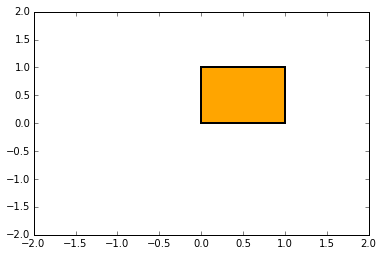

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
patch = ps.PathPatch(path, facecolor='orange', lw=2)
ax.add_patch(patch)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()